# Продажа квартир в Санкт-Петербурге - анализ рынка недвижимости

### Цель исследования

Используя данные сервиса Яндекс.Недвижимость, определить рыночную стоимость объектов недвижимости и типичные параметры квартир

### Описание проекта 

На основе данных сервиса Яндекс.Недвижимость определена рыночная стоимость объектов недвижимости разного типа, типичные параметры квартир, в зависимости от удаленности от центра. Проведена предобработка данных. Добавлены новые данные.
Построены гистограммы, боксплоты, диаграммы рассеивания.

### Описание данных

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

# Вывод
Анализируя данные мы заметим, что:
- данные в чтолбце first_day_exposition имеют тип object, а  не datetime;
- данные в чтолбце floors_total имеют тип float, а не int;
- данные в чтолбце is_apartment имеют тип object, а не bool, также достаточно много пропусков, скорее всего они говорят о том, что это не апартаменты их можно заменить на False;
- данные в чтолбце balcony имеют тип object, а не int, много пропусков, которые могут означать отсутствие балкона, а значит их можно будет заменить на 0;
- данные в чтолбце parks_around3000 имеют тип float, а не int, наличие пропусков может говорить о том, что в данном населенном пункте нет парка;
- данные в чтолбце ponds_around3000 имеют тип float, а не int, наличие пропусков может говорить о том, что в данном населенном пункте нет водоемов;
- данные в чтолбце days_exposition имеют тип float, а не int, наличие пропусков может говорить о том, объвление было недавно размещено, менее суток назад
- в столбце ceiling_height есть пропуски которые могут иметь разные причины, в том числе и техническую ошибку при выгрузке данных, так как высота потолков достаточно важная информация. Эти пропуску можно востановить воспользовавшись медианным значением данных столбца.

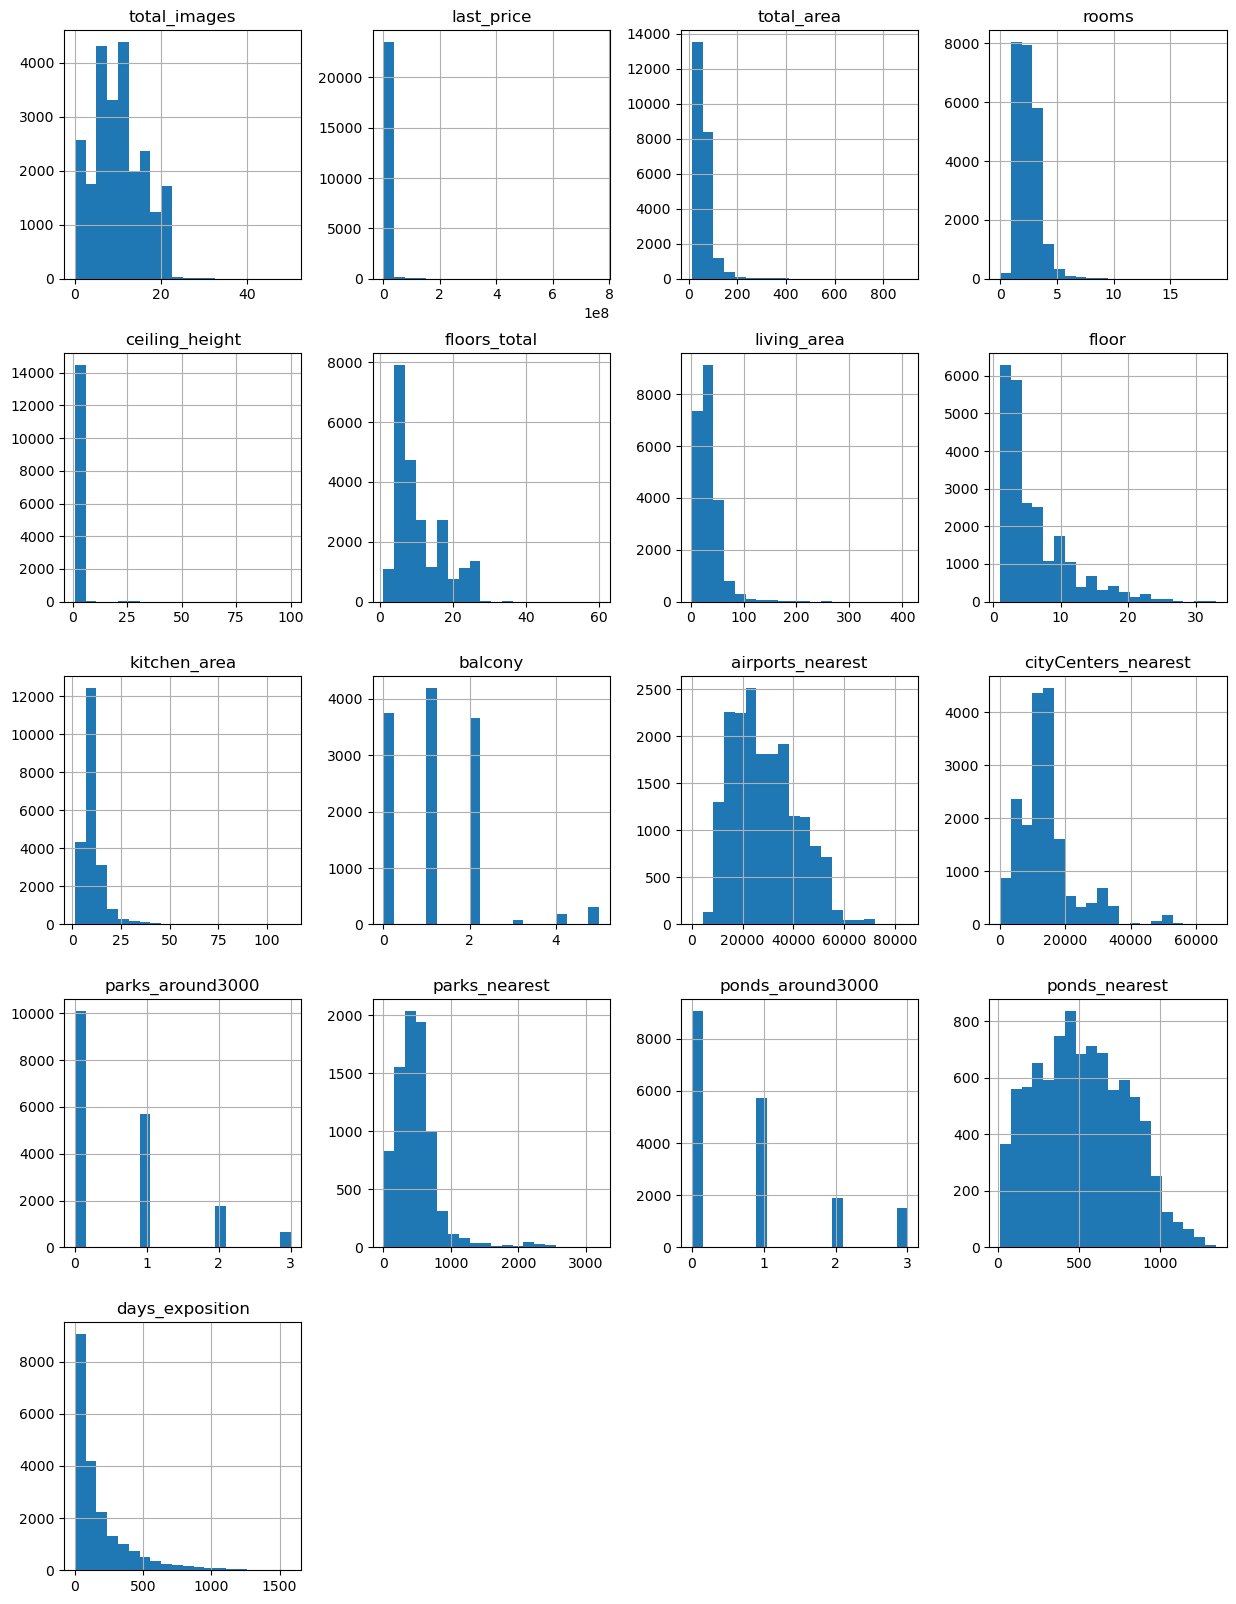

In [5]:
#исследуем данные с помощью гистограмм
data.hist(figsize=(15, 20), bins=20);

# Вывод

- чаще всего объявления имеют фотографии их около 10 в каждом объявлении;
- с возрастанием этажей в доме, количество объявлений становится все меньше. Данные нуждаются в обработке. 
- квартиры имеющие больше 3 комнат уже редкость. Данные нуждаются в обработке.
- площадь кухни в квартирах в большинстве имеет определенный стандарт и редко превышает 50 кв.м. Данные нуждаются в обработке.
- аэропорт в населенных пунктах это не редкость, таких объявлений большинство. На гистограмме есть области очень малых значения которые можно отбросить в дальнейшем. Данные нуждаются в обработке.
- объявлений в которых центр населенного пункта отдален за 20 км очень мало. По графико выдны выбросы, нужно обратить внимание на эти данные. Данные нуждаются в обработке.
- балконов в основном в жилых помешениях не много - 2, 1 или их нет совсем. Данные нуждаются в обработке.
- в большинстве случаях парки находятся в половине километра от квартиры. Объявлений становится меньше с расстоянием от парка.
- ситуация с водоемами напоминает случай с парками, это не удивительно ведь в парках чаще всего они и находятся.
- гистограмма объявлений показывает, что квартиры не задерживаются в объявлениях и снимаются после нескольких месяцев, но есть и те которые там остаются больше года, а то и дольше (есть странность), но таких меньшинство. С этими данными стоит поработать велика вероятность выбросов которые нужно отбросить. Данные нуждаются в обработке.

### Предобработка данных

Посчитаем уникальные значения в столбцах и их количество:

In [6]:
for i in data.columns:
    print('Колонка', i, data[i].value_counts());

Колонка total_images 10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
4      986
14     986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
32       4
28       4
50       3
29       3
27       2
30       2
35       2
31       2
42       1
25       1
39       1
37       1
Name: total_images, dtype: int64
Колонка last_price 4500000.0     342
3500000.0     291
4300000.0     260
4000000.0     260
4200000.0     259
             ... 
12890000.0      1
29375000.0      1
7545600.0       1
5205000.0       1
11475000.0      1
Name: last_price, Length: 2978, dtype: int64
Колонка total_area 45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
184.40      1
55.64       1
56.16       1
109.10      1
76.75       1
Name: total_area, Length: 2182, dtype: int64
Колонка first_day_exposition 2018-02-01T00:00:00

Посчитаем пропуски:

In [7]:
for i in data.columns:
    print(i, data[i].isna().sum(), sep='\t');

total_images	0
last_price	0
total_area	0
first_day_exposition	0
rooms	0
ceiling_height	9195
floors_total	86
living_area	1903
floor	0
is_apartment	20924
studio	0
open_plan	0
kitchen_area	2278
balcony	11519
locality_name	49
airports_nearest	5542
cityCenters_nearest	5519
parks_around3000	5518
parks_nearest	15620
ponds_around3000	5518
ponds_nearest	14589
days_exposition	3181


Заполним пропущенные значения явными обозначениями:

In [8]:
ceiling_height = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height)
data['ceiling_height'].isna().sum()

0

In [9]:
data[data['floors_total'].isna()] 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.65,NaN,30.80,4,NaN,False,False,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.65,NaN,38.40,12,NaN,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,NaN,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.65,NaN,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.80,NaN,NaN,3,NaN,False,False,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,2.65,NaN,31.70,20,NaN,False,False,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,2.65,NaN,45.38,6,NaN,False,False,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,2.65,NaN,50.40,18,NaN,False,False,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


Не понятно из-за чего пропуски, пока трогать их не будем...

In [10]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].isna().sum()

0

In [11]:
data['balcony'] = data['balcony'].fillna(0).astype('int')
data['balcony'].isna().sum()

0

In [12]:
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')
data['balcony'].isna().sum()

0

In [13]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')

In [14]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

In [15]:
data['floors_total'] = data['floors_total'].fillna(0).astype('int')
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

Заменим пропуски медианным значением

In [16]:
height_median = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(height_median)

Заменим пропуски в площадях помещений

In [17]:
living_conversion = data['living_area'].mean() / data['total_area'].mean()
living = data['living_area'].mean() * living_conversion
data['living_area'] = data['living_area'].fillna(living)

kitchen_conversion = data['kitchen_area'].mean() / data['total_area'].mean()
kitchen = data['kitchen_area'].mean() * kitchen_conversion
data['kitchen_area'] = data['kitchen_area'].fillna(kitchen)

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [18]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,18157.000000,18180.000000,23699.000000,8079.000000,23699.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.724358,10.635090,33.270786,5.892358,9.731761,0.591080,28793.672193,14191.277833,0.469049,490.804555,0.590911,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,0.988298,6.616396,21.505970,4.885249,6.174656,0.959298,12630.880622,8608.386210,0.748534,342.317995,0.883999,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,6.300000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,29.000000,4.000000,9.000000,0.000000,26726.000000,13098.500000,0.000000,455.000000,0.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,41.100000,8.000000,11.440000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Явных дубликатов нет. Данные по столбцам повторяются, но это не означает, что их необходимо удалять так как жилье размещенное в одном населенном пункте могут иметь одинаковые данные в столбце locality_name, тоже самое можно сказать и о цене, наличие парка и т.п.

In [19]:
data.duplicated().sum()

0

Устраняем неявные дубликаты в названиях населённых пунктов

In [20]:
data['locality_name'].sort_values().unique()
data['locality_name'] = data['locality_name'].fillna('неизвестно')
data['locality_name'] = data['locality_name'].str.replace('посёлок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок', 'поселок')
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

 Устраним редкие и выбивающиеся значения (аномалии) во всех столбцах

**Исследование на выбросы в ценах на квартиры:**

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23484,11,470000.0,44.5,2018-07-02,2,2.65,2,28.000000,2,False,False,False,7.500000,0,Сланцы,NaN,NaN,0,NaN,0,NaN,298.0
21912,0,470000.0,37.0,2018-02-18,1,2.65,3,19.674733,3,False,False,False,1.851256,0,поселок Совхозный,NaN,NaN,0,NaN,0,NaN,45.0
5698,7,450000.0,42.0,2017-07-31,2,2.65,1,23.000000,1,False,False,False,5.800000,0,поселок Будогощь,NaN,NaN,0,NaN,0,NaN,233.0
17676,0,450000.0,36.5,2018-02-01,1,2.65,5,17.300000,4,False,False,False,8.500000,1,деревня Ям-Тесово,NaN,NaN,0,NaN,0,NaN,120.0
9581,7,450000.0,43.4,2018-08-31,2,2.65,5,30.300000,3,False,False,False,5.500000,0,деревня Старополье,NaN,NaN,0,NaN,0,NaN,96.0
16219,14,450000.0,38.5,2018-07-11,2,2.65,2,19.674733,1,False,False,False,1.851256,0,деревня Вахнова Кара,NaN,NaN,0,NaN,0,NaN,45.0
16274,18,440000.0,40.0,2018-07-10,1,2.65,5,19.674733,1,False,False,False,1.851256,0,деревня Старополье,NaN,NaN,0,NaN,0,NaN,45.0
17456,7,430000.0,30.4,2019-04-22,1,2.65,2,16.000000,1,False,False,False,6.000000,0,Сланцы,NaN,NaN,0,NaN,0,NaN,NaN
14911,5,430000.0,54.0,2018-06-26,2,2.65,3,19.674733,3,False,False,False,1.851256,0,поселок станции Свирь,NaN,NaN,0,NaN,0,NaN,44.0
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.000000,25,False,False,False,40.500000,0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,NaN,8.0


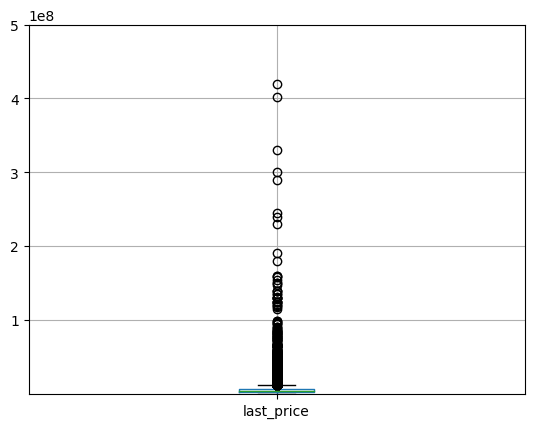

In [21]:
data.boxplot('last_price')
plt.ylim([1000, 500000000])
data['last_price'].describe()

data.sort_values(by='last_price', ascending=False).head(10)

data.sort_values(by='last_price', ascending=False).tail(10)

- квартиры дороже 150000000 очень редки
- есть странносьть которая заключается в стоимости самой дешевой квартиры 12190

<Axes: >

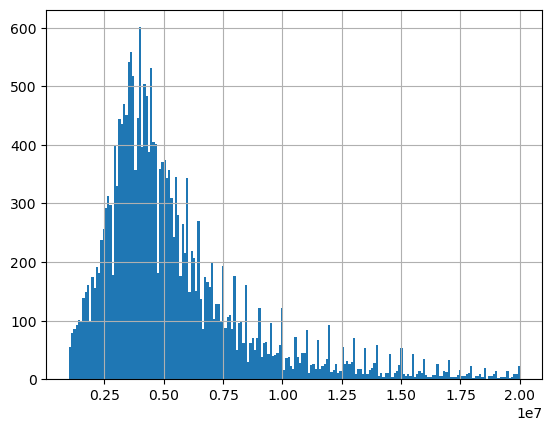

In [22]:
data['last_price'].hist(bins=200, range=(1000000, 20000000)) 

Цены на квартиры (в основном) лежат в диапазоне от 2млн до 5млн

In [23]:
#отбросим все данные столбци выше 150000000 и ниже 1500000.
data = data.query('1000000 < last_price < 20000000')

**Исследование на выбросы в расстоянии до аэропорта:**

(0.0, 100000.0)

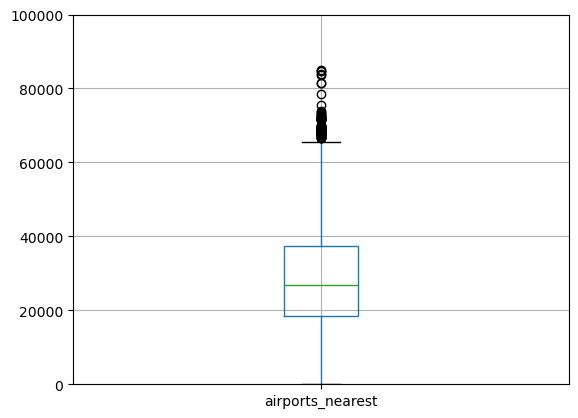

In [24]:
data.boxplot('airports_nearest')
plt.ylim([0, 100000]) 

Аэропорт в отдалении более 65000м будем считать аномалиями. 

<Axes: >

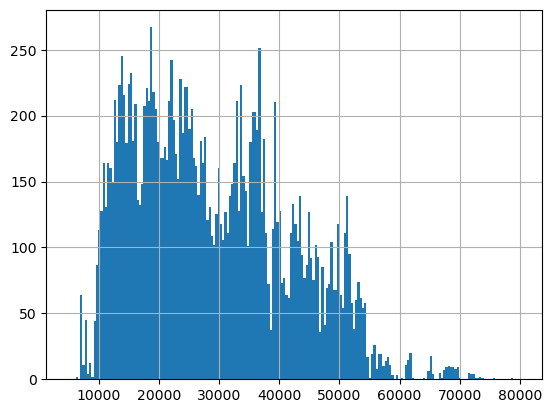

In [25]:
data['airports_nearest'].hist(bins=200, range=(5000, 80000)) 

По гистограмме видно, что аэропорт не может находиться ближе 5 км, это и понятно у таких объектов есть охранная зона.

**Исследование на выбросы в данных общей пложади квартиры:**

(0.0, 500.0)

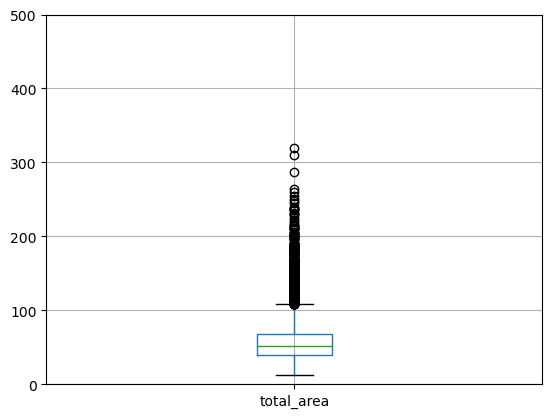

In [26]:
data.boxplot('total_area')
plt.ylim([0, 500])

Выбросы пришлись на квартиры площадь которых выше 125 кв.м. Аномалиями будем считать площади больше 140 кв.м.

45.00    409
42.00    374
60.00    345
44.00    337
31.00    336
        ... 
64.54      1
62.66      1
61.76      1
41.41      1
76.75      1
Name: total_area, Length: 1936, dtype: int64

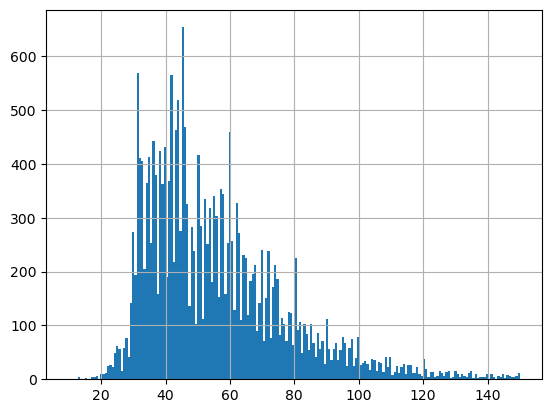

In [27]:
data['total_area'].hist(bins=200, range=(10, 150))
data['total_area'].value_counts()

Наиболее часто встречаются квартиры с площадью от 30 до 60 квадратных метров. Квартиры с площадью более 120 кв.м уже редкость.

In [28]:
#отбросим все данные столбца выше 120 и менее 20.
data = data.query('20 < total_area < 120')

**Исследование на выбросы высоту потолков:**

2.65    9293
2.50    3445
2.60    1624
2.70    1533
2.55     968
        ... 
3.39       1
5.30       1
2.20       1
3.85       1
3.59       1
Name: ceiling_height, Length: 165, dtype: int64

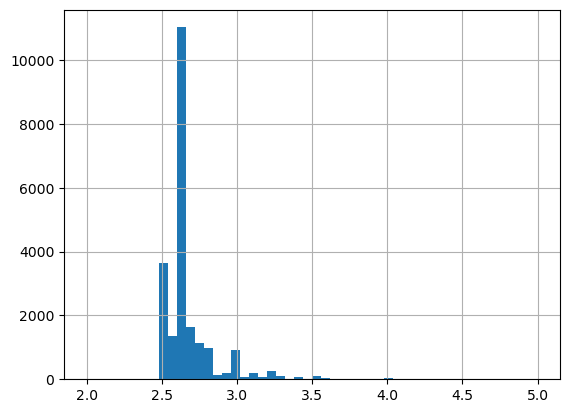

In [29]:
data['ceiling_height'].hist(bins=50, range=(2, 5))
data['ceiling_height'].value_counts() 

Видны анамольно высокие значения высоты потолков 2.65, но удалять их не станем т.к. это составляет достатлчно большую часть таблицы.

(2.0, 4.0)

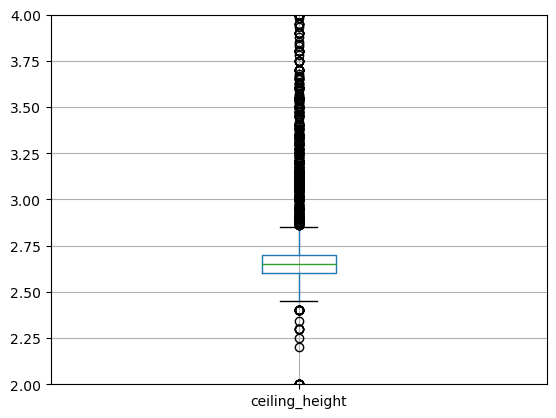

In [30]:
data.boxplot('ceiling_height')
plt.ylim([2, 4])

Отбросим редкие квартиры с высотой потолков выше 3.5 м и ниже 2 м.

In [31]:
data = data.query('2 < ceiling_height < 3.5')

**Исследование на выбросы число комнат в квартирах:**

1    7844
2    7660
3    5295
4     795
0     184
5      80
6       9
7       1
Name: rooms, dtype: int64

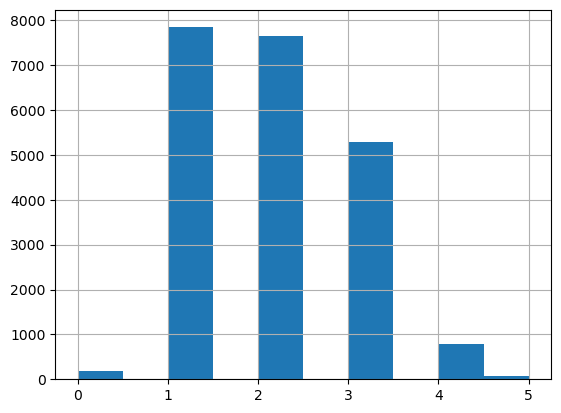

In [32]:
data['rooms'].hist(bins=10, range=(0, 5))
data['rooms'].value_counts()

Оставим квартиры с количеством комнат от 1 до 5.

In [33]:
data = data.query('0 < rooms < 5') 

In [34]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,21594.000000,2.159400e+04,21594.000000,21594.000000,21594.000000,21594.000000,21594.000000,21594.000000,21594.000000,21594.000000,16478.000000,16495.00000,21594.000000,6977.000000,21594.000000,7973.000000,18894.000000
mean,9.795128,5.219196e+06,54.427547,1.955590,2.668275,10.868667,30.142162,5.976614,9.193924,0.601695,28974.918255,14808.34950,0.431370,497.065644,0.550477,529.426941,175.316291
std,5.591555,2.807744e+06,19.121558,0.868206,0.152419,6.637708,13.176563,4.923286,4.679544,0.957853,12913.840106,8443.70573,0.709862,345.313997,0.845973,276.303128,213.352636
min,0.000000,1.010000e+06,20.100000,1.000000,2.200000,0.000000,2.000000,1.000000,1.300000,0.000000,0.000000,287.00000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,6.300000,0.000000,18140.000000,10400.00000,0.000000,293.000000,0.000000,314.000000,44.000000
50%,9.000000,4.500000e+06,50.300000,2.000000,2.650000,9.000000,28.500000,4.000000,8.700000,0.000000,27313.500000,13486.00000,0.000000,458.000000,0.000000,515.000000,93.000000
75%,14.000000,6.253750e+06,65.200000,3.000000,2.700000,16.000000,39.000000,8.000000,11.000000,1.000000,37636.000000,16595.00000,1.000000,617.000000,1.000000,738.000000,223.000000
max,50.000000,1.999900e+07,119.800000,4.000000,3.490000,60.000000,100.000000,33.000000,64.000000,5.000000,84869.000000,65968.00000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


После обработки данных на выбросы стало намного лучше.

### Добавим в таблицу новые столбцы

In [35]:
data['price_of_one_meter'] = data['last_price'] / data['total_area']
data['price_of_one_meter'] = data['price_of_one_meter'].astype('int') #цена одного квадратного метра

data['weekday_exposition'] = data['first_day_exposition'].dt.weekday #день публикации объявления

data['month_exposition'] = data['first_day_exposition'].dt.month #месяц публикации объявления

data['year_exposition'] = data['first_day_exposition'].dt.year #год публикации объявления

def floor_gr(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_gr, axis=1) #изменили тип этажей с помощью функции.

data['cityCenters_km'] = data['cityCenters_nearest'] / 1000
#посчитано и добавлено в таблицу расстояние в км до центра города
data['cityCenters_km'] = data['cityCenters_km'].fillna(value=0).astype('int') 

### Проведем исследовательский анализ данных

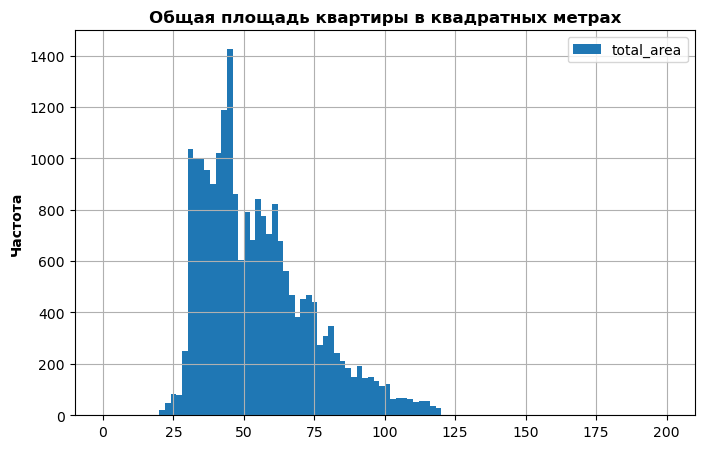

count    21594.000000
mean        54.427547
std         19.121558
min         20.100000
25%         40.000000
50%         50.300000
75%         65.200000
max        119.800000
Name: total_area, dtype: float64

In [36]:
data.plot(y='total_area', kind='hist', bins=100, grid=True, figsize=(8,5), range=(0,200))
plt.title('Общая площадь квартиры в квадратных метрах', fontsize=12, fontweight="bold")
plt.ylabel('Частота', fontsize=10, fontweight="bold")
plt.show()
data['total_area'].describe()

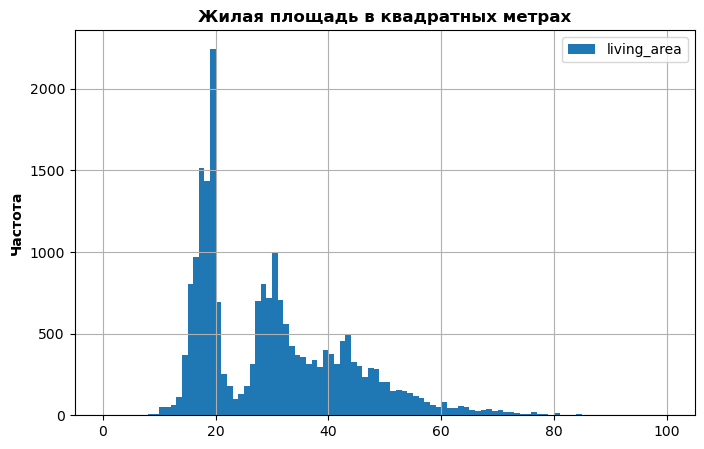

count    21594.000000
mean        30.142162
std         13.176563
min          2.000000
25%         19.000000
50%         28.500000
75%         39.000000
max        100.000000
Name: living_area, dtype: float64

In [37]:
data.plot(y='living_area', kind='hist', bins=100, grid=True, figsize=(8,5), range=(0,100))
plt.title('Жилая площадь в квадратных метрах', fontsize=12, fontweight="bold")
plt.ylabel('Частота', fontsize=10, fontweight="bold")
plt.show()
data['living_area'].describe()

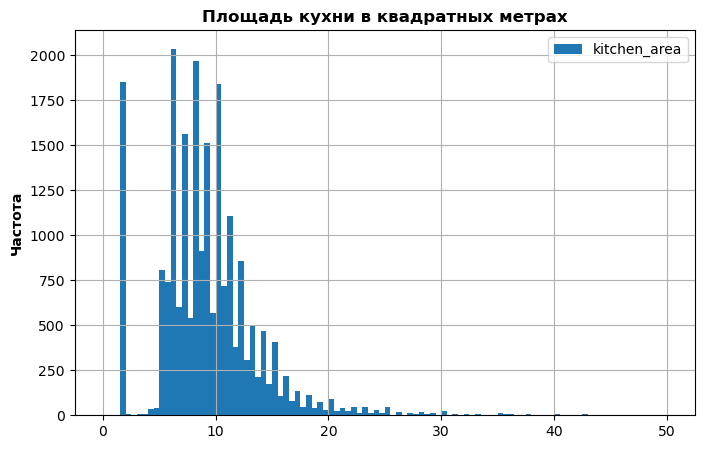

1.851256     1853
6.000000     1239
10.000000    1207
8.000000     1068
9.000000     1053
             ... 
13.270000       1
13.170000       1
6.830000        1
19.420000       1
15.720000       1
Name: kitchen_area, Length: 843, dtype: int64


In [38]:
data.plot(y='kitchen_area', kind='hist', bins=100, grid=True, figsize=(8,5), range=(0,50))
plt.title('Площадь кухни в квадратных метрах', fontsize=12, fontweight="bold")
plt.ylabel('Частота', fontsize=10, fontweight="bold")
plt.show()
data['kitchen_area'].describe()
print(data['kitchen_area'].value_counts())

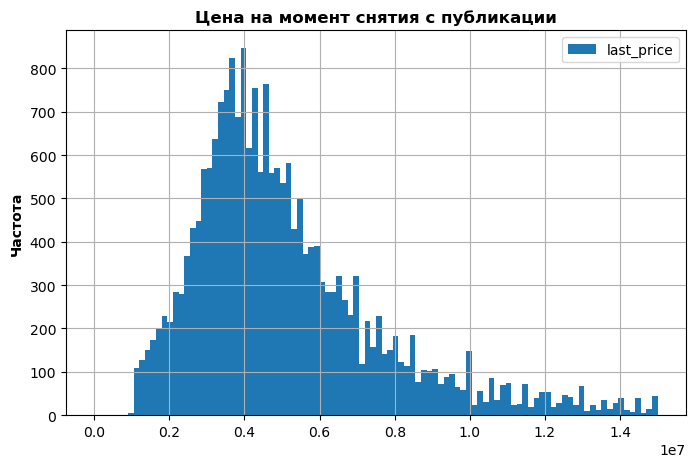

count    2.159400e+04
mean     5.219196e+06
std      2.807744e+06
min      1.010000e+06
25%      3.400000e+06
50%      4.500000e+06
75%      6.253750e+06
max      1.999900e+07
Name: last_price, dtype: float64

In [39]:
data.plot(y='last_price', kind='hist', bins=100, grid=True, range=(0,15000000), figsize=(8,5))
plt.title('Цена на момент снятия с публикации', fontsize=12, fontweight="bold")
plt.ylabel('Частота', fontsize=10, fontweight="bold")
plt.show()
data['last_price'].describe()

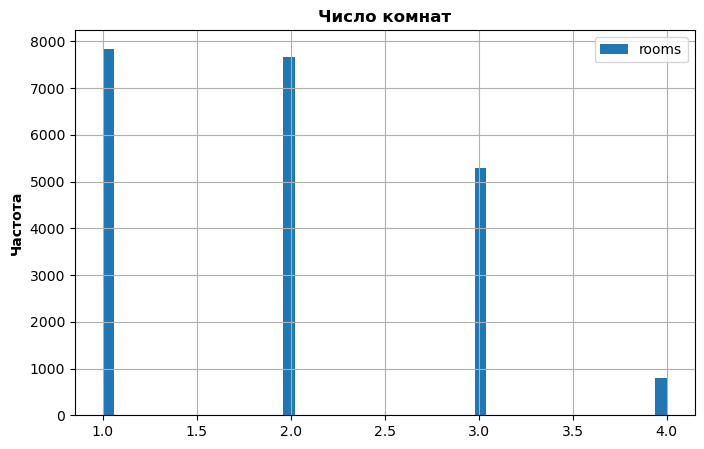

count    21594.000000
mean         1.955590
std          0.868206
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: rooms, dtype: float64

In [40]:
data.plot(y='rooms', kind='hist', bins=50, grid=True, figsize=(8,5))
plt.title('Число комнат', fontsize=12, fontweight="bold")
plt.ylabel('Частота', fontsize=10, fontweight="bold")
plt.show()
data['rooms'].describe()

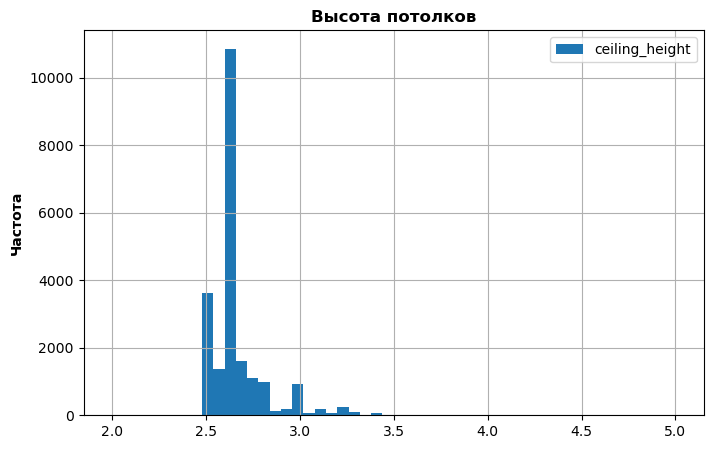

2.65    9147
2.50    3434
2.60    1606
2.70    1508
2.55     965
        ... 
2.99       1
2.34       1
2.20       1
3.39       1
3.49       1
Name: ceiling_height, Length: 106, dtype: int64


In [41]:
data.plot(y='ceiling_height', range=(2, 5), kind='hist', bins=50, grid=True, figsize=(8, 5))
plt.title('Высота потолков', fontsize=12, fontweight="bold")
plt.ylabel('Частота', fontsize=10, fontweight="bold")
plt.show()
data['ceiling_height'].describe()
print(data['ceiling_height'].value_counts())

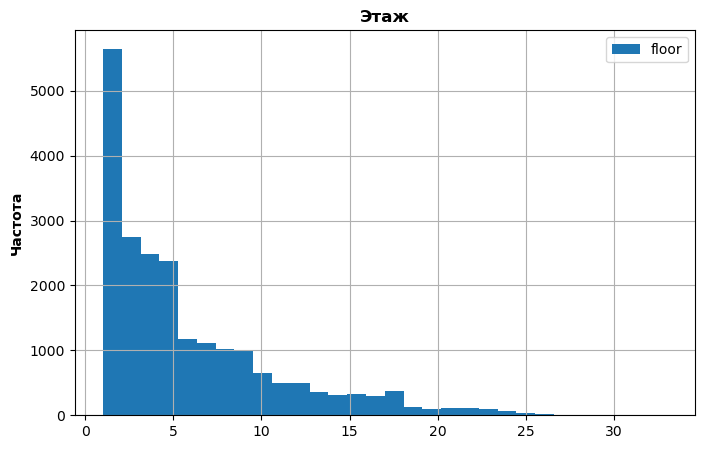

count    21594.000000
mean         5.976614
std          4.923286
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [42]:
data.plot(y='floor', kind='hist', bins=30, grid=True, figsize=(8,5))
plt.title('Этаж', fontsize=12, fontweight="bold")
plt.ylabel('Частота', fontsize=10, fontweight="bold")
plt.show()
data['floor'].describe()

            floor
floor_type       
другой      16018
первый       2648
последний    2928


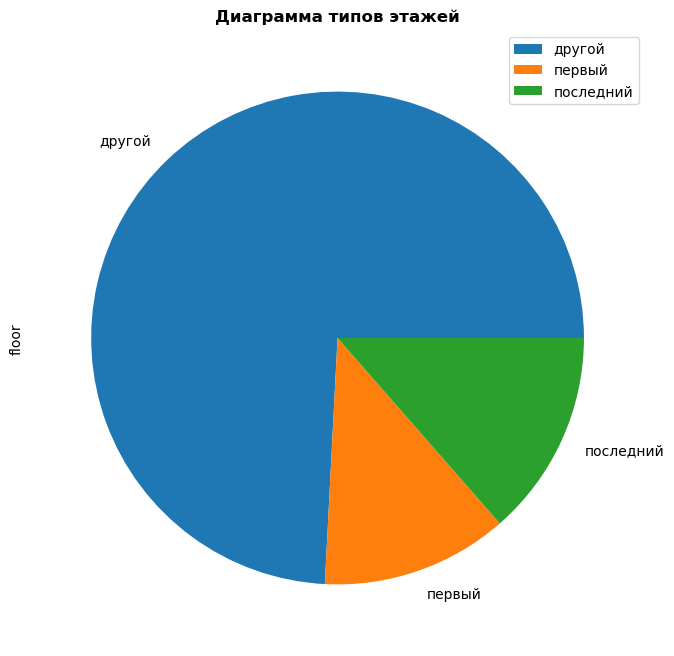

In [43]:
data_floor_type = data.pivot_table(index='floor_type', values='floor', aggfunc='count')
print(data_floor_type)
data_floor_type.plot(y='floor', kind='pie', figsize=(8,8))
plt.title('Диаграмма типов этажей', fontsize=12, fontweight="bold")
plt.show()

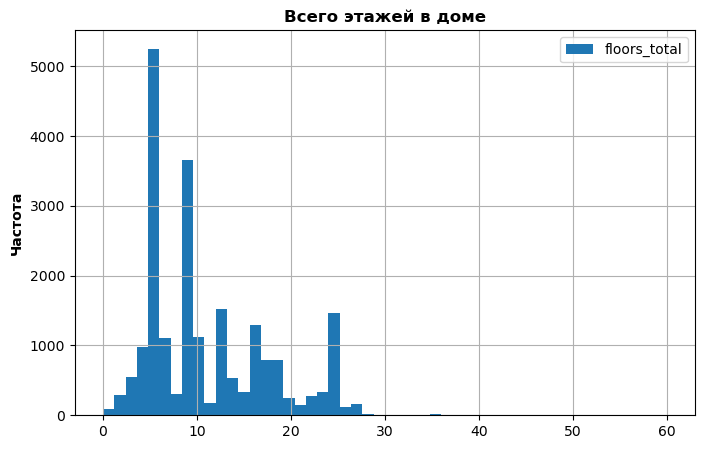

5     5254
9     3665
12    1303
16    1290
10    1118
25    1023
4      984
17     786
6      653
3      550
14     533
18     473
7      451
24     444
23     338
15     335
19     312
8      299
2      288
22     277
20     248
13     213
11     180
27     162
21     148
26     120
0       78
35      22
28      21
1       19
36       2
34       1
60       1
29       1
33       1
52       1
Name: floors_total, dtype: int64


In [44]:
data.plot(y='floors_total', kind='hist', bins=50, grid=True, figsize=(8,5))
plt.title('Всего этажей в доме', fontsize=12, fontweight="bold")
plt.ylabel('Частота', fontsize=10, fontweight="bold")
plt.show()
data['floors_total'].describe() #всего этажей;
print(data['floors_total'].value_counts())

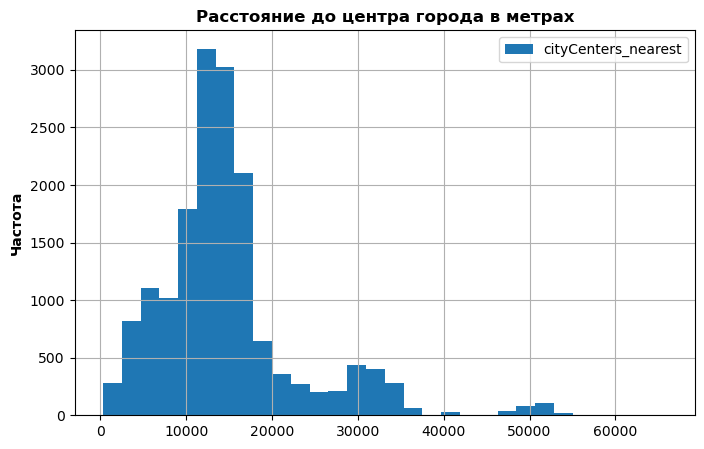

count    21594.000000
mean        10.868667
std          6.637708
min          0.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [45]:
data.plot(y='cityCenters_nearest', kind='hist', bins=30, grid=True, figsize=(8,5))
plt.title('Расстояние до центра города в метрах', fontsize=12, fontweight="bold")
plt.ylabel('Частота', fontsize=10, fontweight="bold")
plt.show()
data['floors_total'].describe()

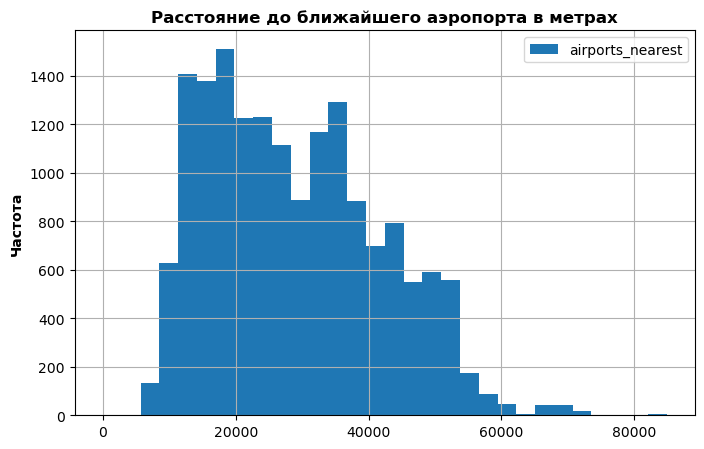

count    16478.000000
mean     28974.918255
std      12913.840106
min          0.000000
25%      18140.000000
50%      27313.500000
75%      37636.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [46]:
data.plot(y='airports_nearest', kind='hist', bins=30, grid=True, figsize=(8,5))
plt.title('Расстояние до ближайшего аэропорта в метрах', fontsize=12, fontweight="bold")
plt.ylabel('Частота', fontsize=10, fontweight="bold")
plt.show()
data['airports_nearest'].describe()

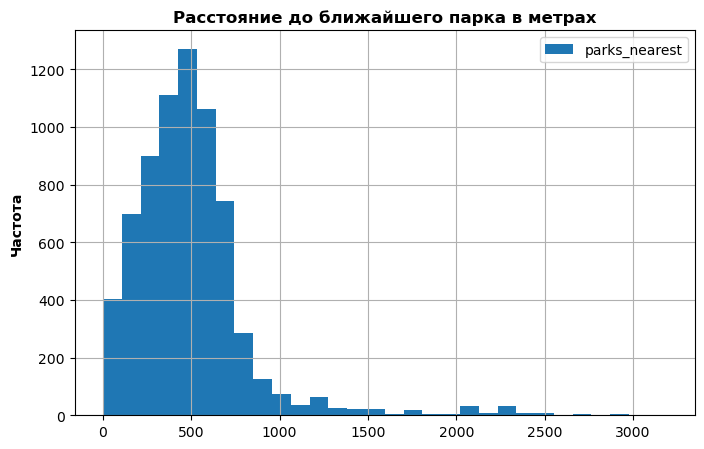

count    6977.000000
mean      497.065644
std       345.313997
min         1.000000
25%       293.000000
50%       458.000000
75%       617.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [47]:
data.plot(y='parks_nearest', kind='hist', bins=30, grid=True, figsize=(8,5))
plt.title('Расстояние до ближайшего парка в метрах', fontsize=12, fontweight="bold")
plt.ylabel('Частота', fontsize=10, fontweight="bold")
plt.show()
data['parks_nearest'].describe()

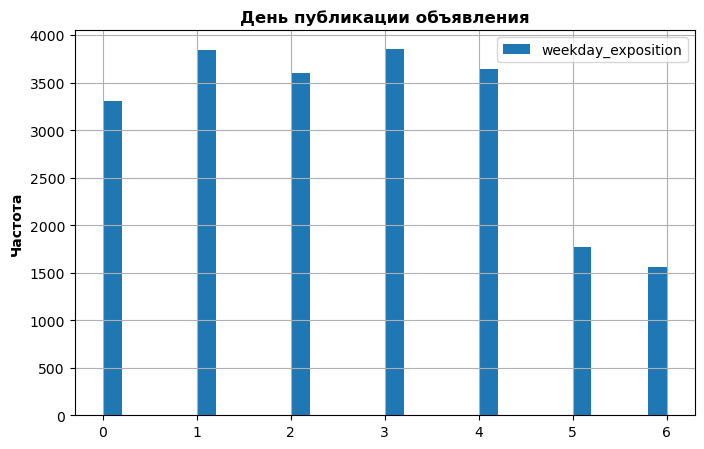

count    21594.000000
mean         2.568260
std          1.793693
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday_exposition, dtype: float64

In [48]:
data.plot(y='weekday_exposition', kind='hist', bins=30, grid=True, figsize=(8,5))
plt.title('День публикации объявления', fontsize=12, fontweight="bold")
plt.ylabel('Частота', fontsize=10, fontweight="bold")
plt.show()
data['weekday_exposition'].describe()

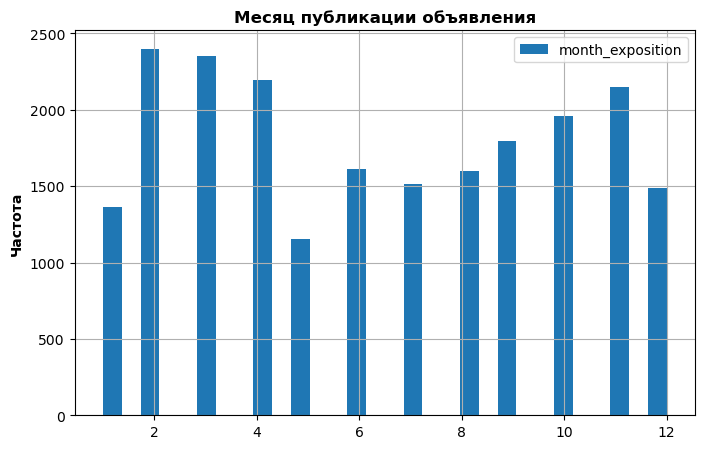

count    21594.000000
mean         6.396221
std          3.489741
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64

In [49]:
data.plot(y='month_exposition', kind='hist', bins=30, grid=True, figsize=(8,5))
plt.title('Месяц публикации объявления', fontsize=12, fontweight="bold")
plt.ylabel('Частота', fontsize=10, fontweight="bold")
plt.show()
data['month_exposition'].describe()

# Вывод
1. Общая площадь жилья убывает по экспоненте (распределение Пуассона), данные впорядке. Чаще встречаются площади в диапазоне от 30 до 60 кв. м;
2. Жилая площадь тоже напоминает распределение Пуассона, но замете провал в районе 25 кв.м. Эти данные убирать не станем, лучше  спросим у сотрудников, предоставивших нам выборку данных. Площадь в большей части данных от 15 до 20 кв. м;
3. Данные о площади кухни впорядке, площадь от 10 до 6 кв. м, за исключением выброса, значение 1.85 встречаются чаще всего, а также много нулей после запятой. Нужно уточнить у сотрудников. 
4. Данные о цене дилья впорядке. основная часть лежит в пределах от 3 млн. до 5 млн. 
5. Данные с количеством комнат также впорядке. Самые часто встречающиеся это 1, 2 и 3 комнаты в квартире;
6. По гистограмме высоты потолковвозникает виден выбросе в самом начеле, но после вывода метода value_counts() становится ясно, что самое часто встречающееся значение имеет 2,65. Вероятно это стандарт по которому застроена большая часть региона(https://gusn.mosreg.ru/deyatelnost/knd/gosudarstvennyy-stroitelnyy-nadzor/normativno-pravovye-akty-soderzhashie-obyazatelnye-trebovaniya/14-09-2018-12-51-38-sp-54-13330-2011-zdaniya-zhilye-mnogokvartir-nye-a).
7. Данные впорядке. Самый высокий этаж 33. Медиана равна 5. Что касается категрии этажей, то по круговой диаграмме заметно, что лишь четверь всех квартир находятся на первом и последнем этажах.
8. Пяти и девятиэтажные дама самое частое явление в данных. Это также может быть связано с типовой застройкой определенного периода времени построек.
9. Расстояние до центра показывает два пика, это может быть связано с тем, что в этом регионе два крупных района жилой застройки;
10. Расстояние до ближайшего аэропорта всреднем от 10 до 30 км. Также есть всплески, которые могут говорить о крупных областях застроек в них.
11. Расстояние до парка от 250м до 700м;
12. Большинство публикаций приходится на первую неделю. С понедельника по субботу;
13. По гистограмме месяца публикации делаем вывод, что есть два сезона в которые наиболее часто встречаются данные. Это со 2 по 4 месц (зимне-весенний период) и с 8 по 11 месяц (осенний период). Летом публикации реже.

# Задание
- Как быстро продавались квартиры (столбец days_exposition)

45.0      822
60.0      524
7.0       219
30.0      195
4.0       165
         ... 
1553.0      1
793.0       1
1434.0      1
1231.0      1
971.0       1
Name: days_exposition, Length: 1100, dtype: int64

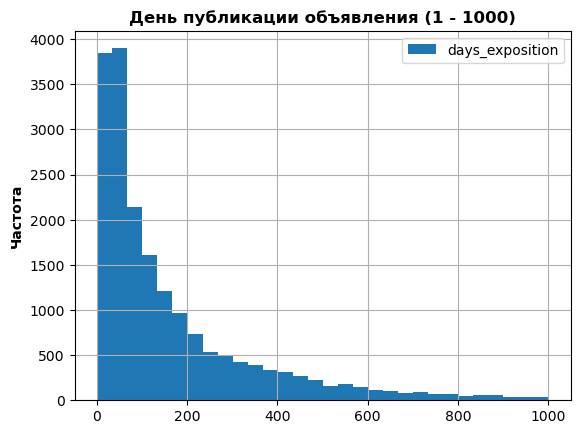

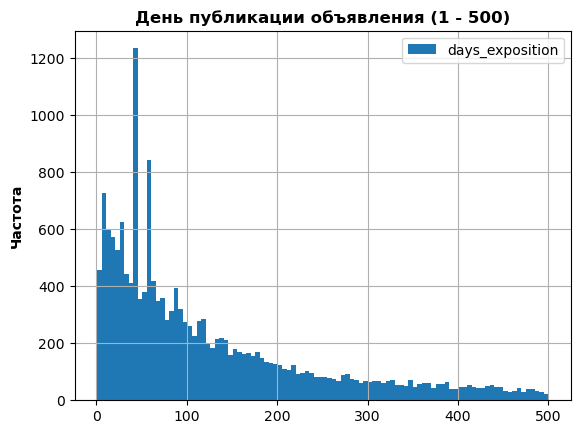

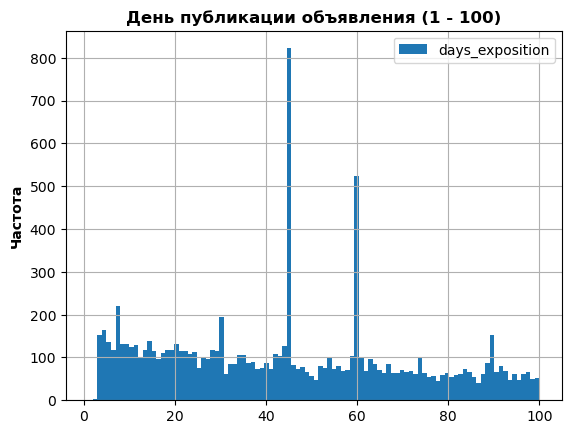

In [50]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1000))
plt.title('День публикации объявления (1 - 1000)', fontsize=12, fontweight="bold")
plt.ylabel('Частота', fontsize=10, fontweight="bold")
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,500))
plt.title('День публикации объявления (1 - 500)', fontsize=12, fontweight="bold")
plt.ylabel('Частота', fontsize=10, fontweight="bold")
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,100))
plt.title('День публикации объявления (1 - 100)', fontsize=12, fontweight="bold")
plt.ylabel('Частота', fontsize=10, fontweight="bold")
data[data['days_exposition']!=0]['days_exposition'].value_counts()

На гистограмме заметны выбросы. Методом value_counts() установленно, что эти всплески приходятся на 90, 60, 45, 30, 7 день.

Исключим выбивающиеся данные и сохраним в новой переменной:

count    17956.000000
mean       182.312486
std        216.530442
min          1.000000
25%         45.000000
50%        101.000000
75%        235.000000
max       1580.000000
Name: days_exposition, dtype: float64

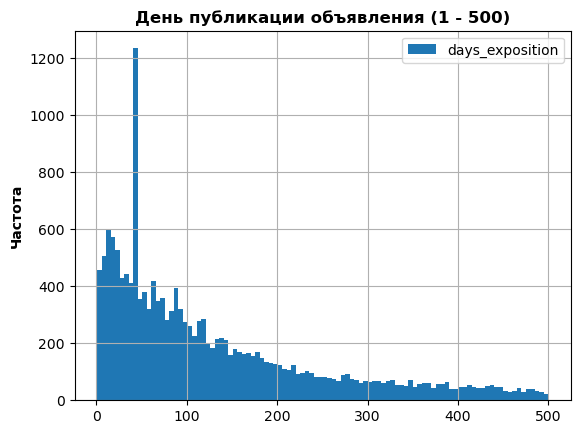

In [51]:
good_data = data.query('days_exposition != 7 and days_exposition != 30 and days_exposition != 45 and days_exposition != 60 and days_exposition != 90')
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,500))
plt.title('День публикации объявления (1 - 500)', fontsize=12, fontweight="bold")
plt.ylabel('Частота', fontsize=10, fontweight="bold")
good_data[good_data['days_exposition']!=0]['days_exposition'].describe()

# Вывод
- первая гистограмма показывает распределение Пуассона, что говорит о достоверных данных. Если рассмотреть график более подробно, установив большее число карзин, то выдны выбросы, которые сложно с чемто связать. Трудно представить что квартиры продавались четко в указанных срок. Возможно в эти периоды объявления снимались из-за не востребованности. Нужно уточнить причину у сотрудников сервиса.
- устранив выбросы установим, что среднее значение равно 188, а медианное значение 108.
- продажа обычно зснимает около месяца (30 дней), самое быстое 1 день, самое долгое объявление висело 1572 дня (больше черырех лет)

# Задание
- Какие факторы больше всего влияют на общую (полную) стоимость объекта? Построим графики, которые покажут зависимость цены от указанных ниже параметров.

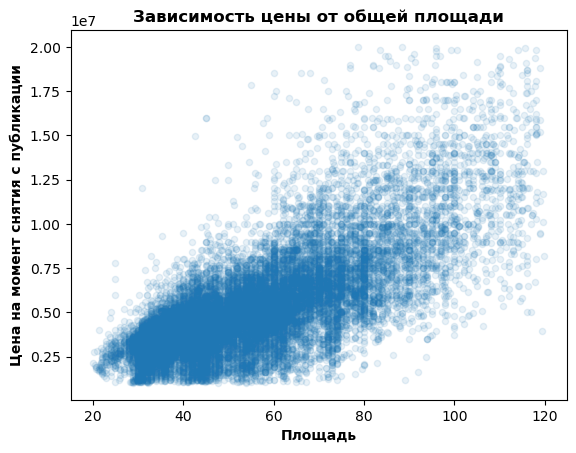

Корреляция цены от общей площади: 0.7344583842136763


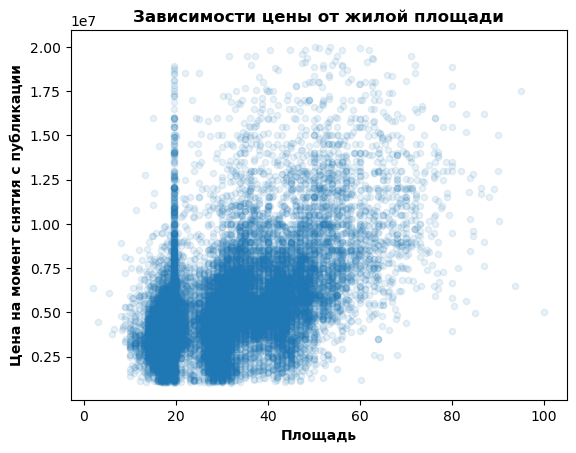

Корреляция цены от жилой площади: 0.5501099984196683


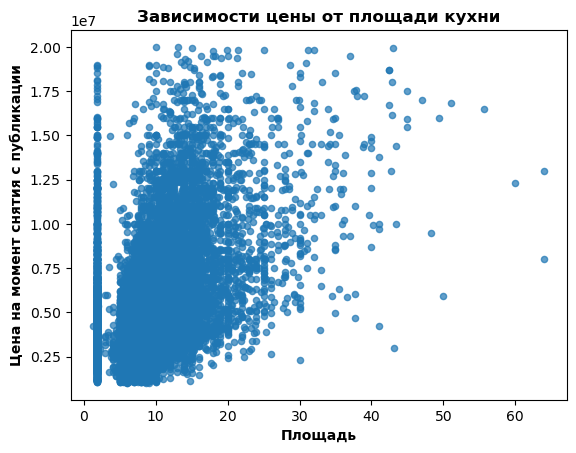

Корреляция цены от площади кухни: 0.469350733328436


In [52]:
#установление зависимости цены от общей площади:
area_dependent = data.pivot_table(index='total_area', values='last_price')
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.1)
plt.ylabel('Цена на момент снятия с публикации', fontsize=10, fontweight="bold")
plt.xlabel('Площадь', fontsize=10, fontweight="bold")
plt.title('Зависимость цены от общей площади', fontsize=12, fontweight="bold")
plt.show()
# определим корреляцию:
area_corr = data['total_area'].corr(data['last_price'])
print('Корреляция цены от общей площади:', area_corr)

#установление зависимости цены от жилой площади:
living_dependent = data.pivot_table(index='living_area', values='last_price')
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.1)
plt.title('Зависимости цены от жилой площади', fontsize=12, fontweight="bold")
plt.ylabel('Цена на момент снятия с публикации', fontsize=10, fontweight="bold")
plt.xlabel('Площадь', fontsize=10, fontweight="bold")
plt.show()
# определим корреляцию:
living_corr = data['living_area'].corr(data['last_price'])
print('Корреляция цены от жилой площади:', living_corr)

#установление зависимости цены от площади кухни:
kitchen_dependent = data.pivot_table(index='kitchen_area', values='last_price')
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.7)
plt.title('Зависимости цены от площади кухни', fontsize=12, fontweight="bold")
plt.ylabel('Цена на момент снятия с публикации', fontsize=10, fontweight="bold")
plt.xlabel('Площадь', fontsize=10, fontweight="bold")
plt.show()
# определим корреляцию:
kitchen_corr = data['kitchen_area'].corr(data['last_price'])
print('Корреляция цены от площади кухни:', kitchen_corr)

# Вывод: 
1. Цена на квартиры явно зависит от общей площади, корреляция равна 0,75. Чем больше общая площадь, тем дороже жилье.
2. Корреляция цены увартиры от жилой площади меньше, чем от общей. Зависимость в данном случае есть, но она не явная.
3. Площадь кухни практичеки не влияет на цену жилья.

**Установление зависимости цены от количества комнат:**

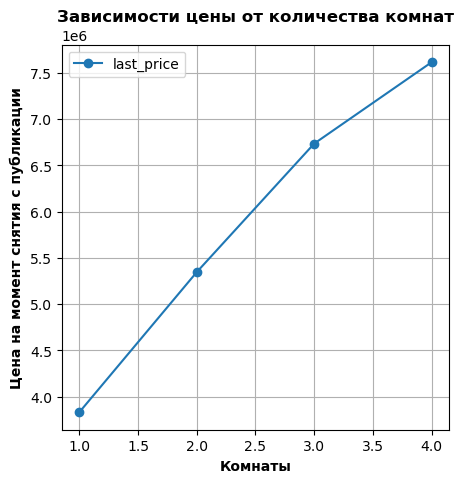

Корреляция цены от количества комнат: 0.4317781743635465


In [53]:
rooms_dependent = data.query('rooms > 0').pivot_table(index='rooms', values='last_price')
rooms_dependent.plot(grid=True, style='o-', figsize=(5, 5))
plt.title('Зависимости цены от количества комнат', fontsize=12, fontweight="bold")
plt.ylabel('Цена на момент снятия с публикации', fontsize=10, fontweight="bold")
plt.xlabel('Комнаты', fontsize=10, fontweight="bold")
plt.show()
# определим корреляцию:
rooms_corr = data['rooms'].corr(data['last_price'])
print('Корреляция цены от количества комнат:', rooms_corr)

**Установление зависимости цены от типа этажа, на котором расположена квартира:**

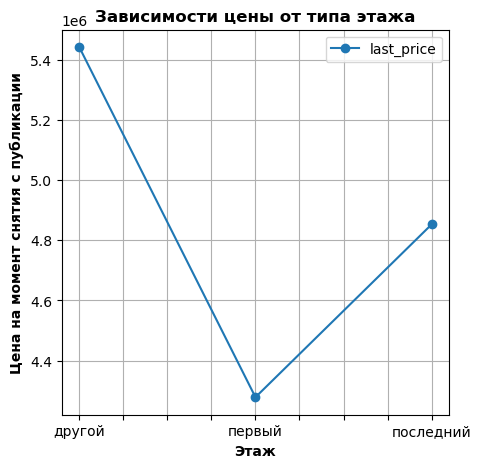

Корреляция цены от типа этажа, на котором расположена квартира: 0.1190026246076328


In [54]:
data['floor_type']
floor_dependent = data.pivot_table(index='floor_type', values='last_price')
floor_dependent.plot(grid=True, style='o-', figsize=(5, 5))
plt.title('Зависимости цены от типа этажа', fontsize=12, fontweight="bold")
plt.ylabel('Цена на момент снятия с публикации', fontsize=10, fontweight="bold")
plt.xlabel('Этаж', fontsize=10, fontweight="bold")
plt.show()
# определим корреляцию:
floor_corr = data['floor'].corr(data['last_price'])
print('Корреляция цены от типа этажа, на котором расположена квартира:', floor_corr)

# Вывод
1. Цена на прямую влияет от количества комнат, чем больше комнат, тем дороже.
2. Корреляция по этажам около 1% этого мало. Заметим то, что самая низкая цена приходится на квартиры расположенные на первом этаже.

**Установление зависимости цены от дня размещения, месяца размещения и года размещения:**

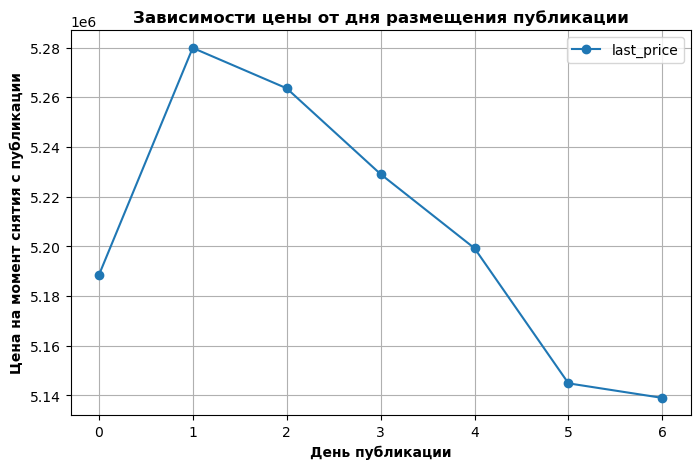

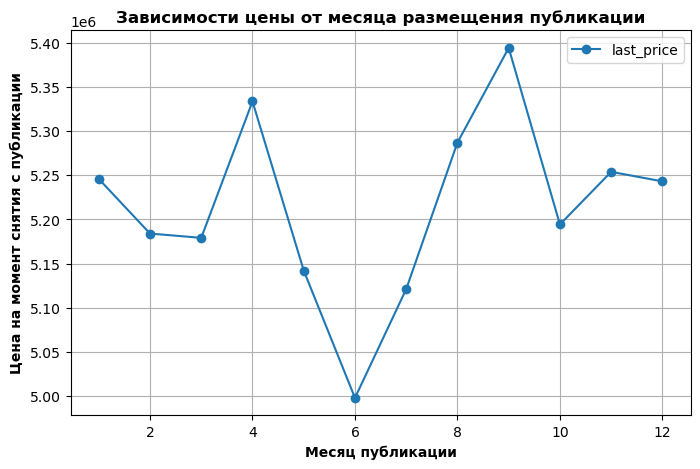

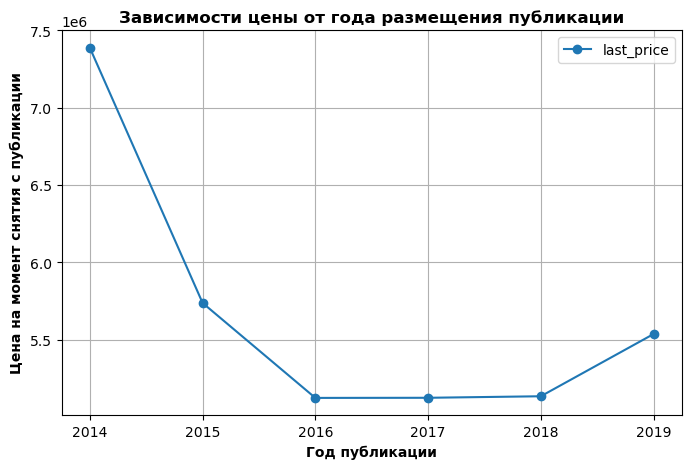

In [55]:
weekday_dependent = data.pivot_table(index='weekday_exposition', values='last_price')
weekday_dependent.plot(grid=True, style='o-', figsize=(8, 5))
plt.title('Зависимости цены от дня размещения публикации', fontsize=12, fontweight="bold")
plt.ylabel('Цена на момент снятия с публикации', fontsize=10, fontweight="bold")
plt.xlabel('День публикации', fontsize=10, fontweight="bold")
plt.show()

month_dependent = data.pivot_table(index='month_exposition', values='last_price')
month_dependent.plot(grid=True, style='o-', figsize=(8, 5))
plt.title('Зависимости цены от месяца размещения публикации', fontsize=12, fontweight="bold")
plt.ylabel('Цена на момент снятия с публикации', fontsize=10, fontweight="bold")
plt.xlabel('Месяц публикации', fontsize=10, fontweight="bold")
plt.show()

year_dependent = data.pivot_table(index='year_exposition', values='last_price')
year_dependent.plot(grid=True, style='o-', figsize=(8, 5))
plt.title('Зависимости цены от года размещения публикации', fontsize=12, fontweight="bold")
plt.ylabel('Цена на момент снятия с публикации', fontsize=10, fontweight="bold")
plt.xlabel('Год публикации', fontsize=10, fontweight="bold")
plt.show()

# Вывод
1. Самые дорогие квартиры выставлялись в четверг, немного дешевле во вторник. Самая низкая цена пришлась на квартиры выставленные в пятницу, субботу и воскресенье.
2. Январь и декабрь имеют цены на квартиры самые высокие. Самые низкие ценники на квартиры выставленные в мае, немного дороже октябре.
1. С 2014 года цены на жилье стали резко падать, с 2015 года падение замедлилось и с 2017 года начали постепенно расти.

# Задание

- Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [56]:
data_name_10 = data['locality_name'].value_counts().head(10)
data_images = data.query('locality_name in @data_name_10.index and locality_name != "неизвестно"')
new_tab = data_images.pivot_table(index='locality_name', values='price_of_one_meter')
new_tab.sort_values(by='price_of_one_meter', ascending=False)

,price_of_one_meter
locality_name,
Санкт-Петербург,108518.350528
Пушкин,101795.090643
деревня Кудрово,92296.749117
поселок Парголово,90448.000000
поселок Мурино,85119.148571
поселок Шушары,78403.039352
Колпино,75420.301493
Гатчина,69179.026578
Всеволожск,67189.096859


# Вывод

- Самые дорогие квартиры находятся в Санкт-Петербург и Пушкине.	Наименьшию стоимость из 10 самых популярных имеют квартиры в поселке Металлострой, Колпино и Красное село. 

# Задание

- Выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишем, как стоимость объектов зависит от расстояния до центра города.

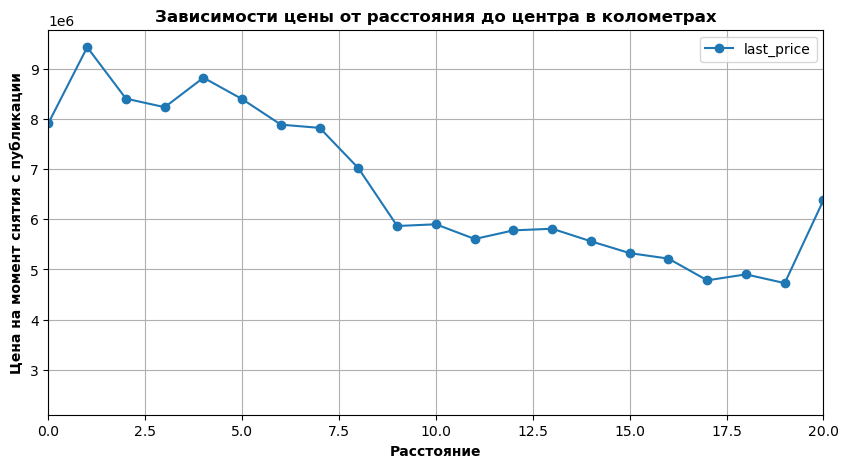

In [57]:
data_spb = data[data['locality_name']=='Санкт-Петербург'].sort_values(by='last_price')
data_spb['cityCenters_km'].corr(data_spb['last_price'])
data_spb.pivot_table(index='cityCenters_km', values='last_price').plot(grid=True, style='o-', xlim=(0,20), figsize=(10, 5))
plt.title('Зависимости цены от расстояния до центра в колометрах', fontsize=12, fontweight="bold")
plt.ylabel('Цена на момент снятия с публикации', fontsize=10, fontweight="bold")
plt.xlabel('Расстояние', fontsize=10, fontweight="bold")
plt.show()

# Вывод

- При отдалении от центра цена на квартиры снижается. Причем на расстоянии 0 - 9 км это снижение рекое, чен на расстоянии от 9 км и больше. Можно заключить, что в радиусе 9 км сильно меняются цены в зависимости от расположения к центру города.

# Общий вывод

- В работе над проектом сначала необходимо было обработать данные. Убрать пропуски, изменить тип некоторых ячеек, убрать неявные дубликаты в названиях населунных пунктов.
- Была проведена работа с выбросами в данных. Удалены аномалии и редкие значения. 
- Расчитаны и добавлены в таблицу новые столбцы: цена одного квадратного метра, день публикации объявления, месяц публикации объявления, год публикации объявления, тип этажа квартиры, расстояние в км до центра города.
- В ходе иследования заключили, что основную массу объявлений составляют квартиры, площадь которых лежит в диапазоне от 30 до 60 кв.м, жилая площадь от 15 до 20 и площадь кухни от 10 до 6 кв.м. Высота потолков всреднем равна 2,65 м, в основном встречаются 1, 2 и 3 комнатные квартиры. Часто дома в которых расположено жилье имеют 9 и 5 этажей, хотя встречаются квартиры и на 33 этаже, но это большая редкость. В большинстве цены на кваритры составляют от 3 млн. до 5 млн. Расстояние до аэропорта от 10 до 30 км. Парк находится на расстоянии от 250 м до 700 м.
- Выяснили что публикация обявлений влияет на цену жилья и те обявления которые вывешивались в четверг и вторник имеют цену несколько выше, чем те которые публиковались в субботу и воскресенье. Обявления о продаже квартир нажодятся на сайте в среднем 108 дней, если не считать момента когда они просто снимаются по неопределенной причине. Причина эта не говорит о том, что все эти квартиры были в раз проданы, возможно это какая-то функция сайта.
- Исследуя зависимости цены от ряда параметров заключили, что общая площадь квартир напрямую влияеи на цену, чем больше площадь и количество комнат тем дороже. На первом этаже квартиры имеют меньшую стоимость чем на других этажах. В целом цены на квартиры с 2014 года сильно снизились и постепенно начинают расти. 
- Исследу цены на квартиры в Санкт-Петербурге выяснили, что чем ближе к центру тем цены становятся выше, явное подорожание начинается с 9 км к центру. Дальше 9 км от центра цены уже не сильно меняются, хотя постепенное снижение цен есть.
